# Visualization of Image Features Extracted using InceptionV3

In [11]:
from os import path
import numpy as np
import json
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
np.set_printoptions(precision=3)

features_path = path.join('..', 'data', 'train_features_matrix.npz')
features = np.load(features_path)['arr_0']

print (features.shape)

(82783, 2048)


In [2]:
caption_data_path = path.join('..', 'data', 'annotations', 'captions_train2014.json')
caption_data = json.load(open(caption_data_path))
images = pd.DataFrame(caption_data['images'])
images = images.set_index('id')

print ('%s rows.' % len(images))
images.head()

82783 rows.


,coco_url,date_captured,file_name,flickr_url,height,license,width
id,,,,,,,
57870,http://images.cocodataset.org/train2014/COCO_t...,2013-11-14 16:28:13,COCO_train2014_000000057870.jpg,http://farm4.staticflickr.com/3153/2970773875_...,480,5,640
384029,http://images.cocodataset.org/train2014/COCO_t...,2013-11-14 16:29:45,COCO_train2014_000000384029.jpg,http://farm3.staticflickr.com/2422/3577229611_...,429,5,640
222016,http://images.cocodataset.org/train2014/COCO_t...,2013-11-14 16:37:59,COCO_train2014_000000222016.jpg,http://farm2.staticflickr.com/1431/1118526611_...,640,1,480
520950,http://images.cocodataset.org/train2014/COCO_t...,2013-11-14 16:44:40,COCO_train2014_000000520950.jpg,http://farm8.staticflickr.com/7007/6413705793_...,427,3,640
69675,http://images.cocodataset.org/train2014/COCO_t...,2013-11-14 16:46:33,COCO_train2014_000000069675.jpg,http://farm8.staticflickr.com/7156/6415223357_...,480,4,640


Query Image


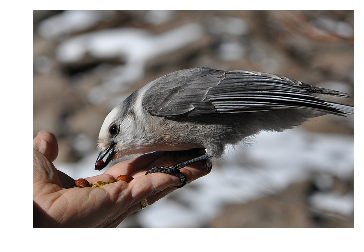

In [3]:
row = images.iloc[55555]
image_path = path.join('..', 'data', 'train2014', row.file_name)
image = Image.open(image_path)

plt.axis('off')
plt.imshow(np.array(image))
print ('Query Image')

In [17]:
from sklearn.metrics.pairwise import cosine_similarity

scores = cosine_similarity(features[55555].reshape(1, -1), features).flatten()
top_similar = scores.argsort()[::-1][:5]
top_dissimilar = scores.argsort()[:5]

print ('Similar image indices:\n')
print ('%10s | %5s' % ('index', 'score'))
for index in top_similar:
    print ('%10s | %3.3f' % (index, scores[index]))

print ('\n\nDissimilar image indices:\n')
print ('%10s | %5s' % ('index', 'score'))
for index in top_dissimilar:
    print ('%10s | %3.3f' % (index, scores[index]))

Similar image indices:

     index | score
     55555 | 1.000
     55554 | 0.893
     51467 | 0.826
     55520 | 0.810
     60588 | 0.796


Dissimilar image indices:

     index | score
     71889 | 0.182
     35437 | 0.191
      7341 | 0.204
     20642 | 0.205
     30041 | 0.206


Similar images: 




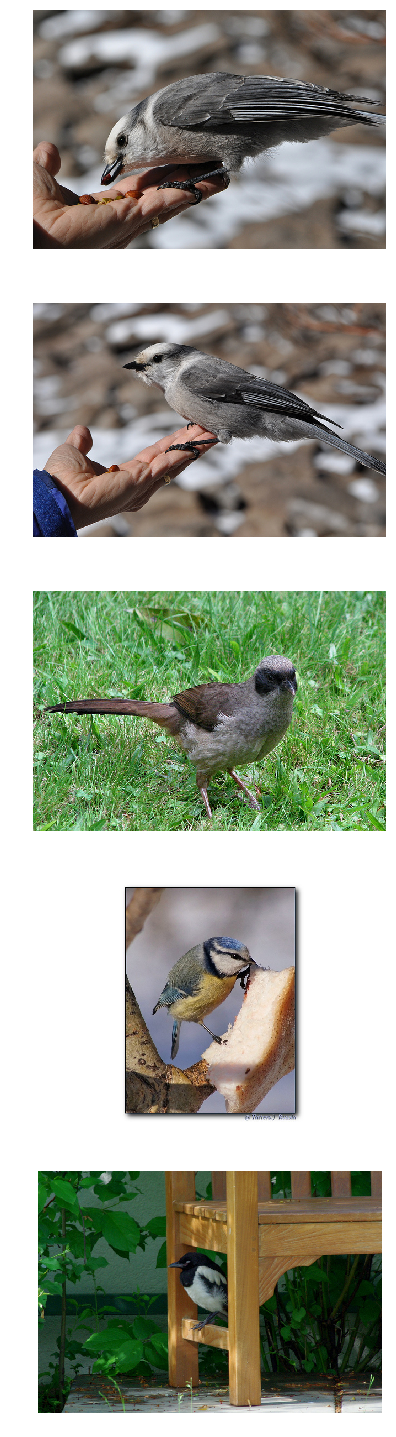

In [7]:
plt.figure(figsize=(5, 30))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.65)

print ('Similar images: \n\n')
for i, index in enumerate(top_similar):
    plt.subplot(5, 1, i + 1)
    row = images.iloc[index]
    image_path = path.join('..', 'data', 'train2014', row.file_name)
    image = Image.open(image_path)
    plt.axis('off')
    plt.imshow(np.array(image))

Dissimilar images: 




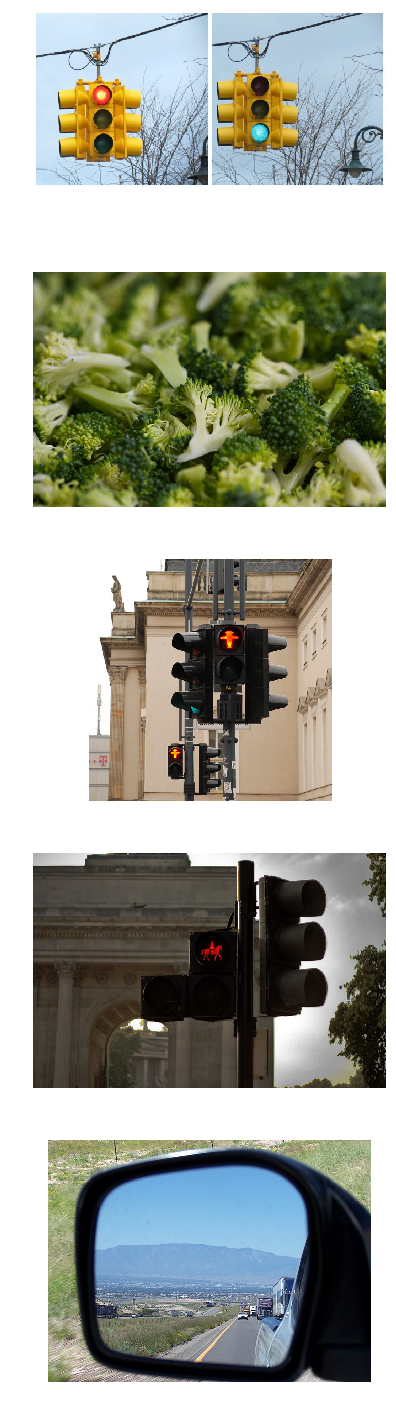

In [8]:
plt.figure(figsize=(5, 30))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.65)

print ('Dissimilar images: \n\n')
for i, index in enumerate(top_dissimilar):
    plt.subplot(5, 1, i + 1)
    row = images.iloc[index]
    image_path = path.join('..', 'data', 'train2014', row.file_name)
    image = Image.open(image_path)
    plt.axis('off')
    plt.imshow(np.array(image))

A Google Search by Image for the query image results in the following images.

![Google Search By Image Results](../images/images.google.png)